In [174]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [175]:
data=pd.read_csv('Bengaluru_House_Data.csv') #reading csv file
data.head() #checking first few rows and columns of our data.

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [176]:
data.shape #checking the shape of the data i.e. rows and columns

(13320, 9)

In [177]:
data.describe(include='all') #high level statistics

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
count,13320,13320,13319,13304,7818,13320,13247.000000,12711.000000,13320.000000
unique,4,81,1305,31,2688,2117,NaN,NaN,NaN
top,Super built-up Area,Ready To Move,Whitefield,2 BHK,GrrvaGr,1200,NaN,NaN,NaN
freq,8790,10581,540,5199,80,843,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,2.692610,1.584376,112.565627
std,NaN,NaN,NaN,NaN,NaN,NaN,1.341458,0.817263,148.971674
min,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000,8.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,1.000000,50.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,2.000000,72.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,2.000000,120.000000


Observation:
There are 10581 ready to move houses.
Most of the houses are 2 bhk.

In [178]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [179]:
#droping features which are not required to build our model.
data2 = data.drop(['area_type','society','balcony','availability'],axis='columns')
data2.shape

(13320, 5)

In [180]:
data2.isnull().sum() #checking null values

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [181]:
data3 = data2.dropna() #dropping null values
data3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [182]:
#creating new feature Bedroom from size feature by spliting the values in size and taking only first value.
data3['Bedrooms'] = data3['size'].apply(lambda x: int(x.split(' ')[0])) 
data3.Bedrooms.unique() #unique values in bedrooms feature.

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [183]:
data3.head()

,location,size,total_sqft,bath,price,Bedrooms
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


Text(0.5, 1.0, 'Count Plot')

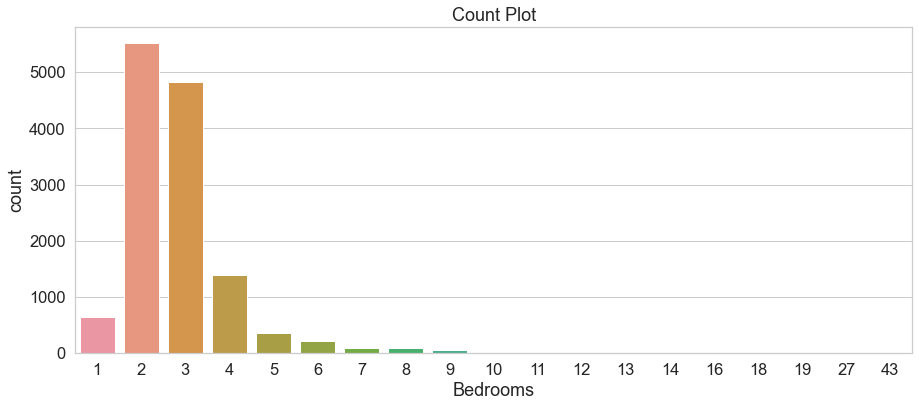

In [184]:
import seaborn as sns #import seaborn 
plt.subplots(figsize=(15,6))
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
sns.color_palette('dark')
sns.countplot(data=data3, x='Bedrooms').set_title("Count Plot")

Observation:
Most of the houses have 2 bedroom followed by 3 bedroom houses.

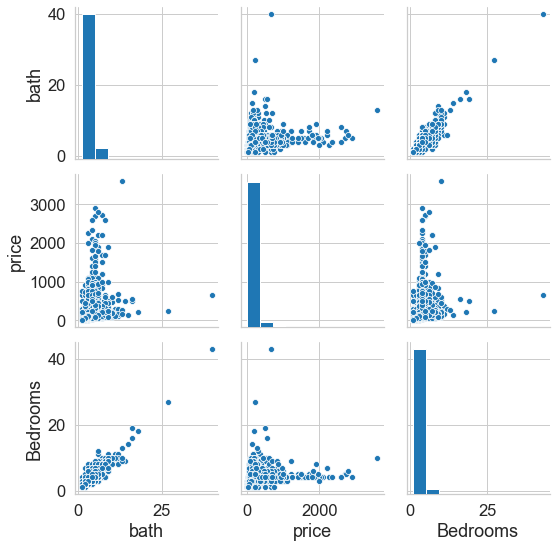

In [185]:
sns.pairplot(data3)

In [186]:
data3[data3.Bedrooms>20] #checking where bedrooms are more than 20.

,location,size,total_sqft,bath,price,Bedrooms
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [187]:
data3['total_sqft'].unique() #checking values in total_sqft feature.

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [188]:
#this function converts the values to float, when exception is raised it returns false else it returns true.
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [189]:
data3[~data3['total_sqft'].apply(is_float)].head(10) # ~ Inverts all the bits.

,location,size,total_sqft,bath,price,Bedrooms
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


From above table we can see that total_sqft can be a range (e.g. 2100-2850).
For range we can take an average, for single value we can convert it to float and rest we can ignore.

In [190]:
"""this function first splits the values by - then performs average it is like this 2100-2850,
converts it to a float value if its a single value i.e. 8000 and returns none if it is like 34.46Sq, Meter, 4125Perch""" 

def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [191]:
data3['total_sqft'][648]

'4125Perch'

In [192]:
data4 = data3.copy()
data4.total_sqft = data4.total_sqft.apply(convert_sqft_to_num)
data4 = data4[data.total_sqft.notnull()]
data4.head(2)

,location,size,total_sqft,bath,price,Bedrooms
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4


In [193]:
data5 = data4.copy() #creating deep copy of the data
data5['price_per_sqft'] = data5['price']*100000/data5['total_sqft'] #creating one new column price per sqft
data5.head()

,location,size,total_sqft,bath,price,Bedrooms,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [194]:
data5['price_per_sqft'].describe() # most of the houses have price 7920.759 per square feet, median is 5438.331 per sq ft.

count    1.320000e+04
mean     7.920759e+03
std      1.067272e+05
min      2.678298e+02
25%      4.267701e+03
50%      5.438331e+03
75%      7.317073e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

In [195]:
data5.location = data5.location.apply(lambda x: x.strip())#strip() method removes any leading and trailing characters 
location_count = data5['location'].value_counts(ascending=False)
location_count

Whitefield             535
Sarjapur  Road         392
Electronic City        304
Kanakpura Road         266
Thanisandra            236
                      ... 
Kanakapur main road      1
Park View Layout         1
HAL Layout               1
Meenakshi Layout         1
Hullahalli               1
Name: location, Length: 1293, dtype: int64

In [196]:
len(location_count) #we have 1293 locations in our data.

1293

In [197]:
len(location_count[location_count>10]) #241 location with count i.e. datapoints greater than 10

241

In [198]:
location_count_less_than_10 = location_count[location_count<=10]
len(location_count[location_count<=10]) #1052 locations with count less than 10.

1052

In [199]:
len(data5.location.unique()) #we had 1293 locations in our data.

1293

In [200]:
#Making location to other where count is less than 10
data5.location = data5.location.apply(lambda x: 'other' if x in location_count_less_than_10 else x)
len(data5.location.unique()) #unique locations reduced from 1293 to 242

242

# Removing Outliers

In [201]:
# typically 1 bedroom is around 300 sqft, checking where 1 bedroom is less than 300 sqft. 
data5[data5.total_sqft/data5.Bedrooms<300].head()

,location,size,total_sqft,bath,price,Bedrooms,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000


In [202]:
data5.shape

(13246, 7)

In [203]:
data6 = data5[~(data5.total_sqft/data5.Bedrooms<300)] #removing data where rooms are less than 300 sqft per bedroom.
data6.shape

(12502, 7)

In [204]:
data6["price_per_sqft"].describe() 
#The minimum per square feet is 267.829813 and the maximum per square feet is 176470.588235.

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [205]:
"""This functions removes outlier which are not in 1 standard deviation range, 
first we are groupping by location and calulating mean and std. dev. of each location, 
if it is in 1 std. dev. range we are keeping it.
"""

def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out

data7 = remove_pps_outliers(data6)
data7.shape #from 12502 to 10241 we have removed 2261 data points.

(10241, 7)

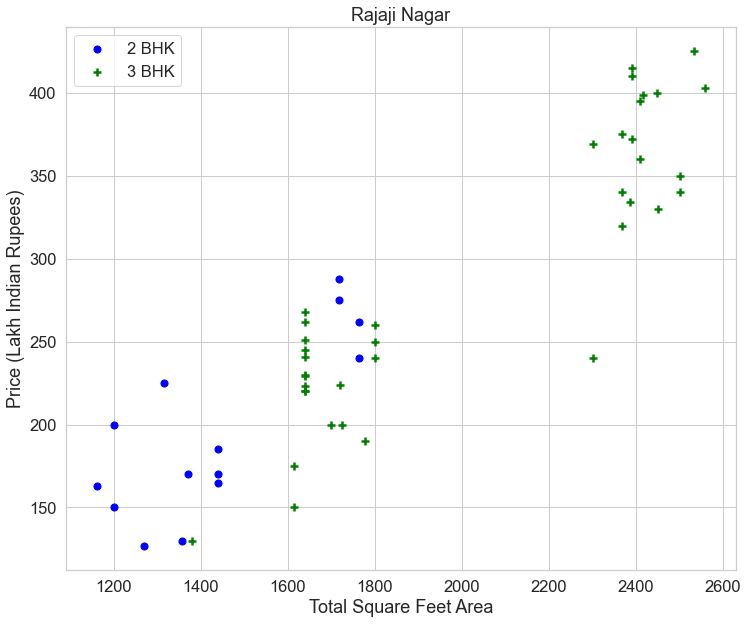

In [206]:
#visualization of 2 bedrooms and 3 bedrooms in a location.
import matplotlib.pyplot as plt

def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.Bedrooms==2)]
    bhk3 = df[(df.location==location) & (df.Bedrooms==3)]
    plt.rcParams["figure.figsize"] = (12,10) 
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(data7,"Rajaji Nagar")

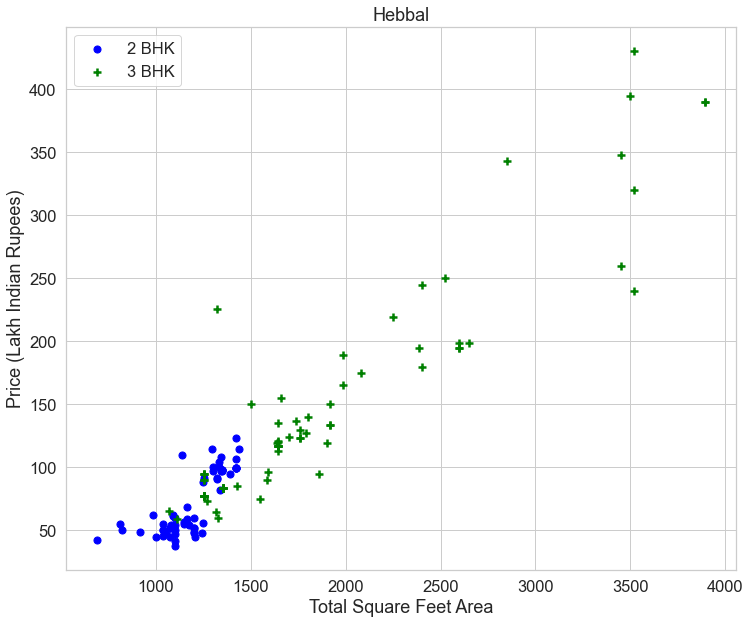

In [207]:
plot_scatter_chart(data6,"Hebbal")

# Outlier Removal Using Bathrooms Feature

Text(0, 0.5, 'Count')

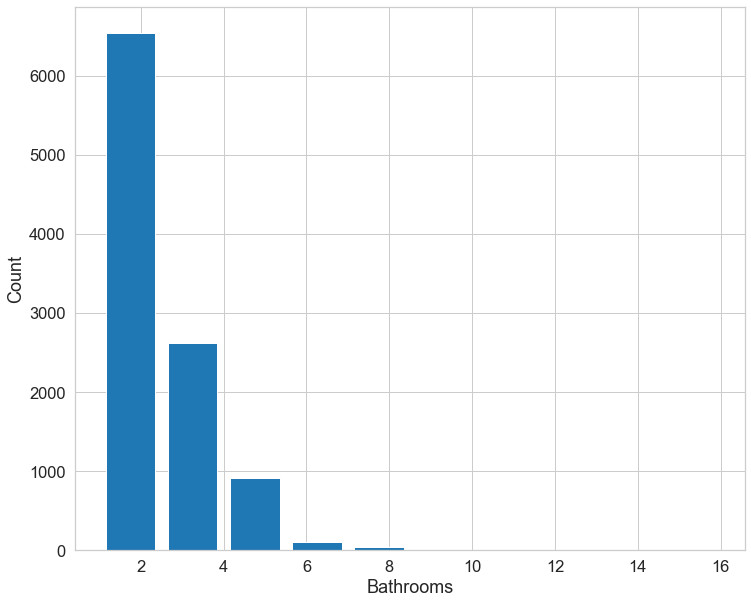

In [220]:
plt.hist(data7.bath,rwidth=0.8)
plt.xlabel("Bathrooms")
plt.ylabel("Count")

In [209]:
data7[data7.bath>10] #checking where bathrooms are more than 10

,location,size,total_sqft,bath,price,Bedrooms,price_per_sqft
5277,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
8486,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
8575,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
9308,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
9639,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


In [219]:
data7[data7.bath>data7.Bedrooms+2] #checking where bathrooms are more than bedroom+2

,location,size,total_sqft,bath,price,Bedrooms,price_per_sqft
1626,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5238,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6711,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8411,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689


In [217]:
data7.shape

(10241, 7)

In [218]:
# removing datapoints where bathrooms are more than bedrooms+2
data8 = data7[data7.bath<data7.Bedrooms+2] 
data8.shape

(10147, 7)

In [221]:
data8.head()

,location,size,total_sqft,bath,price,Bedrooms,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3,10833.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,11983.805668


In [222]:
data9 = data8.drop(['size','price_per_sqft'],axis='columns')
data9.head(3)

,location,total_sqft,bath,price,Bedrooms
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3


In [223]:
#performing one hot encoding of categorical feature location
dummies = pd.get_dummies(data9.location) #pd.dummies Convert categorical variable into dummy/indicator variables.
dummies.head(3)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [224]:
#dropping other column from one hot encoded feature location
#concatenating one hot encoded feature with data.
data10 = pd.concat([data9,dummies.drop('other',axis='columns')],axis='columns')
data10.head()

,location,total_sqft,bath,price,Bedrooms,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,130.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,148.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [225]:
data11 = data10.drop('location',axis='columns') #dropping location columns
data11.head(2)

,total_sqft,bath,price,Bedrooms,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [226]:
data11.shape

(10147, 245)

# Modeling

In [228]:
X = data11.drop(['price'],axis='columns')
y = data11.price

In [229]:
#splitting our dataset to train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [230]:
#appling linear regression to our X_train data and checking its accuracy on X_test data.
from sklearn.linear_model import LinearRegression
lr_reg = LinearRegression()
lr_reg.fit(X_train,y_train)
lr_reg.score(X_test,y_test)

0.7919477337586842

In [231]:
#Using k-Fold cross validation to measure accuracy of our LinearRegression model

from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.81155684, 0.77261421, 0.80214981, 0.80426801, 0.79827292])

In [233]:
def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return lr_reg.predict([x])[0]

In [235]:
predict_price('Electronic City Phase II',1000, 2, 2)

27.770840622404982

In [236]:
predict_price('Electronic City Phase II',2000, 3, 3)

101.4494940857465

# Export the tested model to a pickle file

In [238]:
import pickle
with open('banglore_home_prices_model.pickle','wb') as f:
    pickle.dump(lr_reg,f)